In [1]:
import pandas as pd
import numpy as np
import platform #os 정보를 가져 올 수 있는 모듈
import seaborn as sns

from matplotlib import font_manager, rc # font_manager : 폰트 관리 모듈, rc : 폰트 변경 모듈
from matplotlib import pyplot as plt # 시각화 도구
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False # 유니코드 표현 설정하기

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # OS가 APPLE(Darwin)이면 AppleGothic으로 폰트 설정
elif platform.system() == 'Windows':
    path="c:/Windows/Fonts/malgun.ttf" #OS가 윈도우즈면 맑은 고딕으로 설정
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown System… sorry~~~~')

In [21]:
lol = pd.read_csv("./data/high_diamond_ranked_10min.csv")
lol.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [16]:
lol_copy = lol.copy()
lol_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [19]:
column_names = ['gameId', 'blueWins', 'blueFirstBlood']
lol_columns = lol[column_names]
lol_columns

,gameId,blueWins,blueFirstBlood
0,4519157822,0,1
1,4523371949,0,0
2,4521474530,0,0
3,4524384067,0,0
4,4436033771,0,0
...,...,...,...
9874,4527873286,1,1
9875,4527797466,1,0
9876,4527713716,0,0
9877,4527628313,0,1


In [25]:
# 퍼스트 킬을 한 블루팀 추출
lol_mask = lol["blueFirstBlood"] == 1
lol_fk1 = lol[lol_mask]
lol_fk1.head()
# 퍼스트킬한 블루팀의 이긴 횟수
lol_fk_win = lol_fk1.groupby('blueFirstBlood')[['blueWins']].count()
lol_fk_win
# 퍼스트 킬 못한 블루팀 추출
lol_mask = lol["blueFirstBlood"] == 0
lol_fk0 = lol[lol_mask]
lol_fk0.head()
# 퍼스트킬 못한 블루팀의 이긴 횟수
lol_fk_lose = lol_fk0.groupby('blueFirstBlood')[['blueWins']].count()
lol_fk_lose

,blueWins
blueFirstBlood,
0,4892


In [27]:
lol_concat = pd.concat([lol_fk_win, lol_fk_lose], axis=0)
lol_concat

,blueWins
blueFirstBlood,
1,4987
0,4892


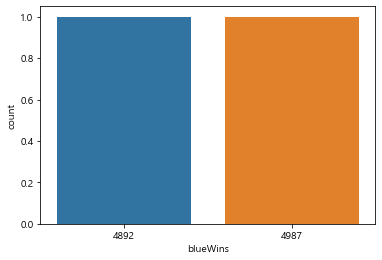

In [36]:
sns.countplot(lol_concat['blueWins'], data=lol_concat)
plt.show()

In [38]:
plt.bar(lol_concat['blueWins'], lol_concat['blueFirstBlood'])
plt.show()

KeyError: 'blueFirstBlood'

In [43]:
lol_reset = lol_concat.reset_index()
lol_reset

,blueFirstBlood,blueWins
0,1,4987
1,0,4892


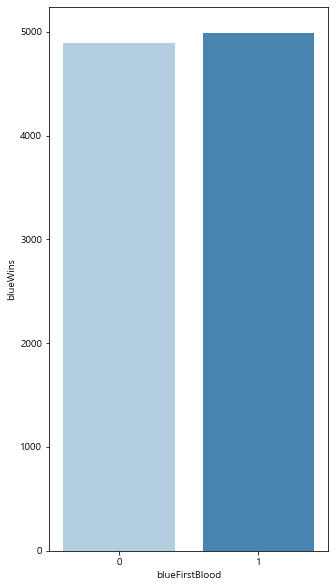

In [53]:
plt.figure(figsize=(5, 10))
sns.barplot(x='blueFirstBlood', y='blueWins', data=lol_reset, palette="Blues")
plt.show()

In [63]:
ward15_mask = lol["blueWardsPlaced"] <= 15
lol_ward15 = lol[ward15_mask]
lol_ward15
ward30_mask = 15 < lol["blueWardsPlaced"] & lol["blueWardsPlaced"] <= 30
lol_ward30 = lol[ward30_mask]
lol_ward30

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [64]:
(df['age'] < 35) & ~(df['state'] == 'NY')

NameError: name 'df' is not defined

In [69]:
lol_sort = lol.sort_values(by="blueWardsPlaced")

In [75]:
lol_sort["blueWardsPlaced"]

1766      5
5831      5
4169      7
8795      8
2832      8
       ... 
6405    198
6401    203
6116    209
3742    221
8206    250
Name: blueWardsPlaced, Length: 9879, dtype: int64

In [143]:
lol_ward_win = lol_sort.groupby('blueWardsPlaced')[['blueWins']].sum()

In [134]:
data = lol["blueWardsPlaced"]

In [142]:
for i in data :
    j= round(i - 5, -1)
    print(j)
    if 15 >= j:
        
    elif 15 < j and j <= 50:
    
    elif 50 < j and 90 <= j:
    
    else:

20
10
10
40
70
10
10
10
10
10
20
30
10
10
10
10
10
40
20
10
10
10
10
70
30
10
10
10
100
10
20
10
10
10
40
20
10
20
10
10
20
30
10
10
10
40
10
10
10
10
10
10
20
30
10
10
10
10
20
10
10
20
10
120
10
50
10
30
10
10
10
30
10
10
10
40
10
10
10
10
40
10
20
10
10
10
10
10
10
10
80
10
10
10
10
10
10
40
10
10
10
10
10
10
20
10
10
10
10
10
10
10
10
10
30
10
10
10
10
20
10
10
10
10
10
30
40
10
40
10
10
10
10
40
10
10
20
10
10
20
10
80
10
10
20
10
10
10
10
10
10
20
60
10
0
10
10
90
10
10
10
10
10
10
50
10
30
0
10
20
10
10
10
30
10
10
10
10
10
10
10
80
10
10
20
10
10
10
10
10
20
10
20
10
10
10
10
10
10
40
10
10
10
10
10
10
60
20
10
10
10
10
30
10
30
10
20
120
10
20
10
30
20
40
10
10
30
10
10
70
10
20
10
10
40
10
10
30
40
20
10
50
10
10
10
10
10
20
10
30
40
10
10
20
10
10
10
10
20
10
10
10
50
0
10
10
20
10
10
10
10
10
10
30
30
10
10
20
10
40
30
10
10
10
10
30
10
30
10
10
10
10
10
10
10
10
10
10
20
10
30
10
10
0
10
10
20
10
10
10
10
10
10
10
10
10
10
10
10
10
10
20
10
50
10
10
10
10
20
20
10
20
30
10

20
80
10
10
10
10
10
10
10
10
10
10
10
10
10
10
40
10
10
10
10
80
60
10
40
10
10
10
10
10
10
20
0
10
20
10
10
10
10
90
10
10
10
10
10
20
10
10
10
10
10
70
10
10
20
10
20
10
10
20
10
10
20
10
20
30
70
10
10
20
10
10
10
10
10
20
30
20
10
40
30
10
10
10
10
30
10
10
10
30
10
10
20
10
10
30
10
10
10
10
10
10
10
10
50
10
10
10
10
20
20
10
10
10
10
10
100
10
10
40
10
10
30
10
40
10
10
10
10
30
10
40
10
10
10
30
10
40
10
10
10
10
10
30
10
10
10
40
10
10
30
10
10
10
30
10
10
80
20
10
10
10
10
10
10
10
10
10
10
10
10
30
10
10
10
10
10
10
10
10
10
10
10
10
30
60
10
10
30
80
10
20
30
10
10
10
80
10
120
10
10
20
10
10
10
100
10
10
10
30
10
10
10
10
10
80
10
10
20
10
10
10
10
20
10
40
10
20
10
0
10
10
10
10
20
20
30
30
10
10
30
10
10
10
10
10
10
20
80
10
10
10
10
10
10
10
10
10
10
10
10
10
20
10
20
20
50
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
0
30
10
10
10
10
10
10
10
20
10
10
10
10
20
20
40
10
10
10
20
10
10
10
10
10
10
10
30
10
20
30
10
10
10
10
10
20
20
10
10
20
10
10
10
10
10
10
10
10
1

10
10
20
60
10
30
20
10
10
40
10
40
10
10
10
40
10
10
90
10
40
20
20
10
10
10
130
10
10
10
30
10
40
10
10
10
40
10
10
10
10
20
10
30
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
60
10
50
10
20
10
10
10
10
20
70
10
10
40
20
10
20
10
10
20
10
10
10
60
10
0
10
10
10
10
10
10
20
10
20
10
10
10
10
20
10
10
10
20
10
10
50
50
20
10
10
10
10
80
10
10
10
10
10
10
10
10
10
10
90
10
10
10
10
10
30
10
0
40
10
10
10
90
10
0
20
20
20
10
10
30
40
60
40
10
10
10
10
10
10
20
10
10
20
10
10
10
40
10
20
10
10
10
20
10
20
50
10
10
30
20
10
40
10
10
10
30
10
10
10
10
10
10
10
20
10
10
10
20
0
10
30
10
10
10
20
10
10
10
30
80
10
10
20
10
10
10
10
10
30
40
40
30
10
30
10
10
10
10
10
10
10
10
10
80
10
10
10
10
10
10
60
10
10
10
10
10
10
10
10
10
10
10
10
10
40
10
10
10
20
10
10
10
10
10
10
10
10
20
10
10
10
10
20
10
20
10
10
10
20
30
10
10
70
20
10
10
40
10
10
30
10
20
10
10
30
20
20
10
10
80
10
20
30
10
10
10
10
20
10
10
10
10
10
10
10
10
10
10
10
10
10
40
80
10
10
10
10
10
10
10
10
50
10
20
3

In [79]:
lol_ward_cnt = lol_sort.groupby('blueWardsPlaced')[['blueWins']].count()

In [121]:
lol_win_rate = lol_ward_win / lol_ward_cnt

In [123]:

x = lol_win_rate.reset_index()
x

,blueWardsPlaced,blueWins
0,5,0.500000
1,7,1.000000
2,8,0.375000
3,9,0.410256
4,10,0.437500
...,...,...
142,198,0.000000
143,203,1.000000
144,209,0.000000
145,221,0.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


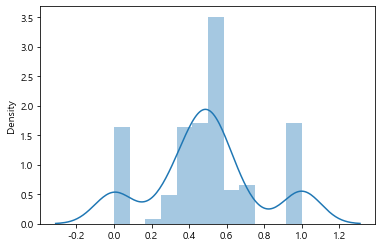

In [95]:
sns.distplot(x)
plt.show()

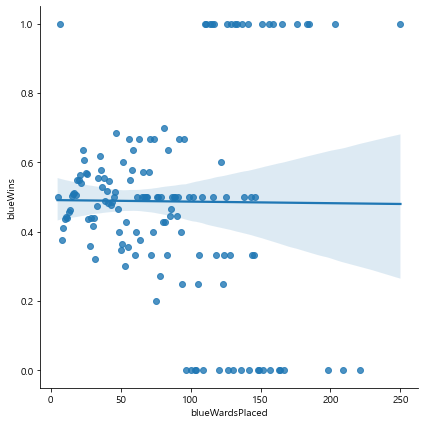

In [107]:
sns.lmplot(x='blueWardsPlaced', y='blueWins', height=6, data=x)
plt.show()

In [110]:
lol[(lol['blueWardsPlaced'] > 0) & ~(lol['blueWardsPlaced'] < 30)]

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
11,4453038156,0,33,2,1,11,11,7,1,0,...,0,18200,7.0,19142,188,52,1505,635,18.8,1820.0
17,4503636905,0,43,3,0,3,7,3,1,0,...,0,16827,6.8,18233,218,53,1975,1345,21.8,1682.7
23,4520898233,0,78,4,0,4,3,4,2,1,...,0,15500,7.0,17936,220,64,-406,-1283,22.0,1550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9861,4527729232,0,36,3,0,4,13,5,0,0,...,0,19565,7.2,19283,199,71,5087,4618,19.9,1956.5
9864,4527898486,1,57,3,1,5,4,5,1,1,...,0,15240,6.8,16761,202,40,-725,-1773,20.2,1524.0
9865,4527885240,1,34,1,0,4,7,1,0,0,...,0,16722,7.0,18740,215,56,1461,69,21.5,1672.2
9870,4527811425,1,46,2,1,5,3,2,0,0,...,0,14949,6.8,18046,202,64,-1974,-1712,20.2,1494.9


C:\Users\HKEDU\AppData\Local\Temp/ipykernel_13476/4102715423.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lol[lol_ward_10]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).